In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the CSV file into a pandas DataFrame
data = pd.read_csv('robot_positions.csv')

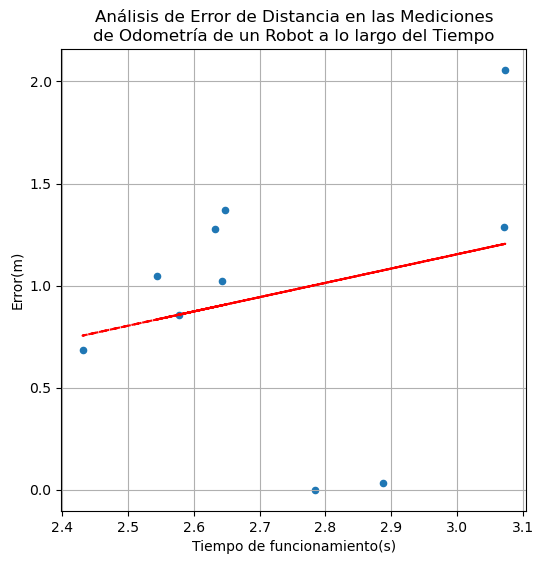

In [2]:
plt.figure(figsize=(6, 6))
plt.scatter(data['time_delta'], data['distance_error'], label='Distance Error', marker='o', s=20)
plt.xlabel('Tiempo de funcionamiento(s)')
plt.ylabel('Error(m)')
plt.title('Análisis de Error de Distancia en las Mediciones\nde Odometría de un Robot a lo largo del Tiempo')
plt.grid(True)

# Fit a linear regression line
z = np.polyfit(data['time_delta'], data['distance_error'], 1)
p = np.poly1d(z)

# Plot the trendline
plt.plot(data['time_delta'], p(data['time_delta']), "r--", label="Trendline")


Se puede apreciar en la imagen existe una tendencia a que el error en la medicion de distancia sea proporcional al tiempo de funcionamiento, en otras palabras el error se va acumulando. Se debe implementar algun mecanismo o termino de correción para estabilizar este error, caso contrario las mediciones carecern de sentido.

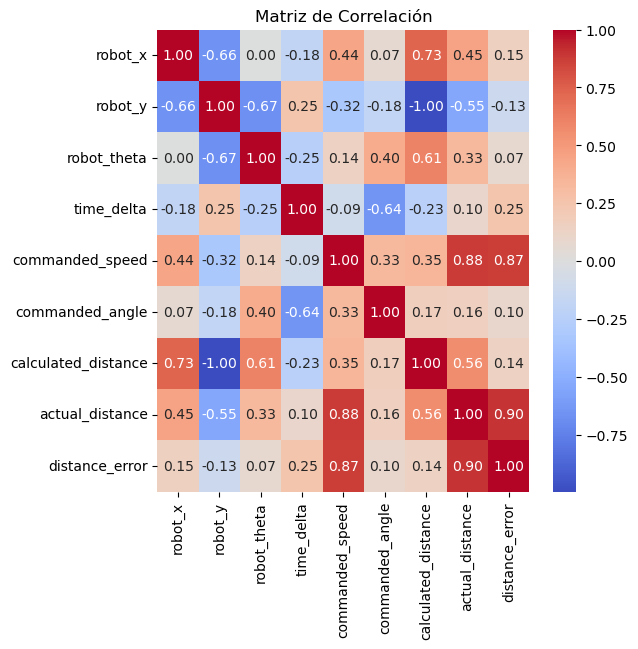

In [10]:
corr_matrix = data.corr()
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Los resultados del mapa de calor revelan las relaciones entre las variables en el conjunto de datos. Se puede notar que cuando la posición del robot en el eje X (`robot_x`) aumenta, tiende a haber un aumento en la velocidad comandada (`commanded_speed`) y la distancia calculada (`calculated_distance`). Por otro lado, cuando `robot_x` aumenta, se observa una tendencia a la disminución en la posición del robot en el eje Y (`robot_y`) y la distancia real (`actual_distance`). También destacamos la fuerte relación negativa entre `robot_y` y la distancia calculada, lo que significa que cuando la posición del robot en el eje Y aumenta, la distancia calculada disminuye de manera proporcional. Además, la velocidad comandada está fuertemente relacionada con la distancia real y el error de distancia. Estos hallazgos proporcionan información valiosa sobre cómo estas variables interactúan en tu conjunto de datos.